In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random

random.seed(45)


## Reading Data

In [2]:
li = []

for i in range(1,42):
    string = 'Attribute'+str(i)
    li.append(string)
li.append("Class")

df = pd.read_csv('biodeg.csv', sep = ';', names = li)

In [3]:
X = df.iloc[:, 0:41]
y = df.select_dtypes(include = [object])

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

## Splitting Train and Test Sets

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 17)

## Pre processing Data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Performing MLP Classification

In [7]:
def accuracy(confusion_matrix): # Function to calculate accuracy given confusion Matrix
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

models = [(), (2), (6), (2,3), (3,2)] # The models 
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001] # The learning rates
accuracy_list = []
max_acc = 0.0
best_model = 0
best_rate = 0
for i in range(5):
    for j in range(5):
        classifier = MLPClassifier(hidden_layer_sizes = models[i], solver = 'sgd', learning_rate_init = learning_rates[j], random_state = 45, max_iter = 5000)
        classifier.fit(X_train, y_train.values.ravel())
        y_pred = classifier.predict(X_test)

        cm = confusion_matrix(y_pred, y_test)
        acc = accuracy(cm)
        accuracy_list.append(acc)
        
        if acc > max_acc:
            max_acc = acc
            best_model = i
            best_rate = j


In [9]:
accuracy_list

[0.8672985781990521,
 0.8625592417061612,
 0.8530805687203792,
 0.8104265402843602,
 0.6777251184834123,
 0.8483412322274881,
 0.8483412322274881,
 0.8767772511848341,
 0.8293838862559242,
 0.3127962085308057,
 0.8056872037914692,
 0.8341232227488151,
 0.8672985781990521,
 0.8009478672985783,
 0.6540284360189573,
 0.8625592417061612,
 0.8483412322274881,
 0.8436018957345972,
 0.6919431279620853,
 0.33649289099526064,
 0.8199052132701422,
 0.8246445497630331,
 0.8578199052132701,
 0.7488151658767772,
 0.5781990521327014]

In [10]:
print("Best Model: ", models[best_model])
print("Best Learning Rate: ", learning_rates[best_rate])
print("Maximum Accuracy: ", max_acc)

Best Model:  2
Best Learning Rate:  0.001
Maximum Accuracy:  0.8767772511848341


## Plotting the required Accuracy Graphs

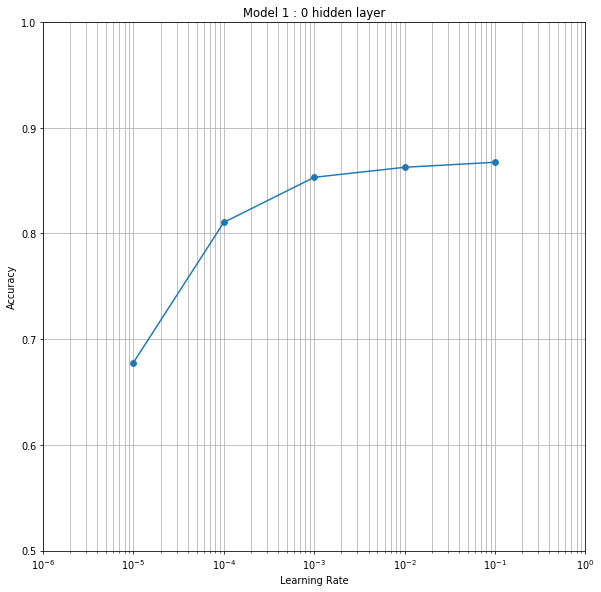

In [11]:
accuracy_model1 = accuracy_list[:5]
x = [0.1, 0.01, 0.001, 0.0001, 0.00001]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.semilogx(x, accuracy_model1, marker = 'o')
plt.xlim([0.000001, 1])
plt.ylim([0.5, 1])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Model 1 : 0 hidden layer')
plt.show()

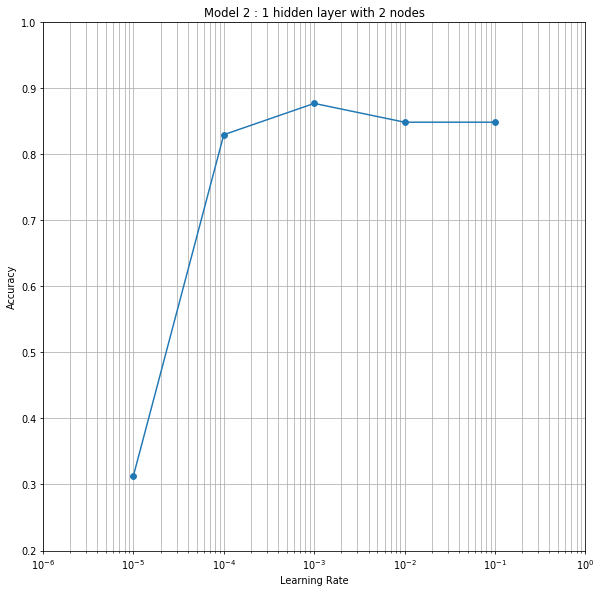

In [12]:
accuracy_model2 = accuracy_list[5:10]
x = [0.1, 0.01, 0.001, 0.0001, 0.00001]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.semilogx(x, accuracy_model2, marker = 'o')
plt.xlim([0.000001, 1])
plt.ylim([0.2, 1])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Model 2 : 1 hidden layer with 2 nodes')
plt.show()

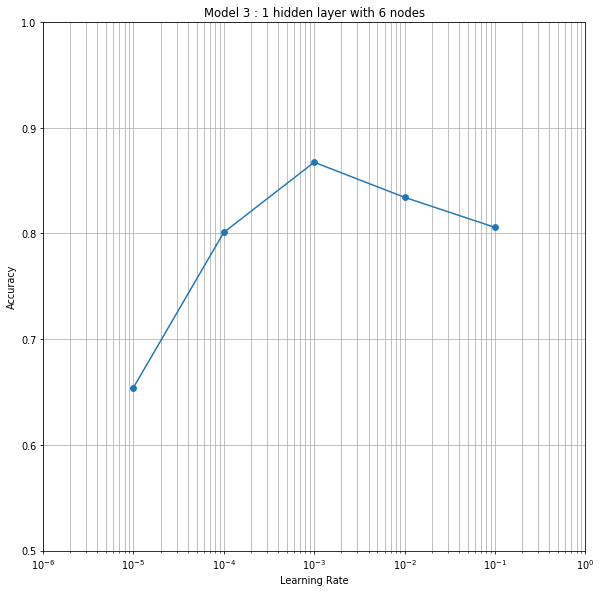

In [13]:
accuracy_model3 = accuracy_list[10:15]
x = [0.1, 0.01, 0.001, 0.0001, 0.00001]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.semilogx(x, accuracy_model3, marker = 'o')
plt.xlim([0.000001, 1])
plt.ylim([0.5, 1])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Model 3 : 1 hidden layer with 6 nodes')
plt.show()

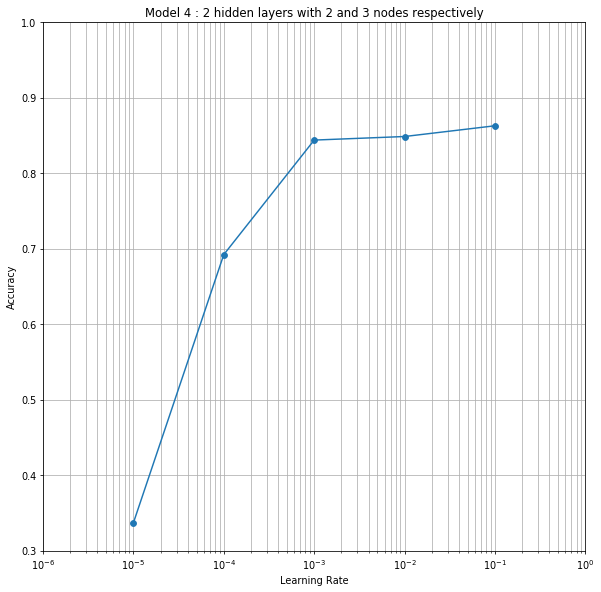

In [14]:
accuracy_model4 = accuracy_list[15:20]
x = [0.1, 0.01, 0.001, 0.0001, 0.00001]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.semilogx(x, accuracy_model4, marker = 'o')
plt.xlim([0.000001, 1])
plt.ylim([0.3, 1])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Model 4 : 2 hidden layers with 2 and 3 nodes respectively')
plt.show()

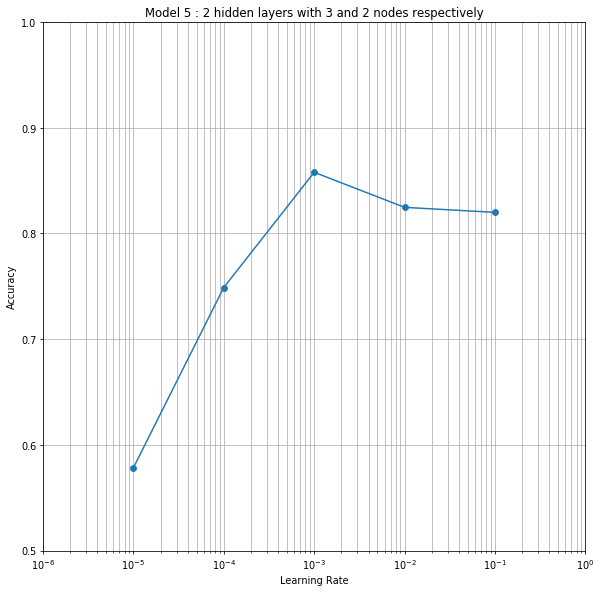

In [15]:
accuracy_model5 = accuracy_list[20:25]
x = [0.1, 0.01, 0.001, 0.0001, 0.00001]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.semilogx(x, accuracy_model5, marker = 'o')
plt.xlim([0.000001, 1])
plt.ylim([0.5, 1])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Model 5 : 2 hidden layers with 3 and 2 nodes respectively')
plt.show()

In [16]:
accuracy_rate1 = []
accuracy_rate2 = []
accuracy_rate3 = []
accuracy_rate4 = []
accuracy_rate5 = []

for i in range(5):
    accuracy_rate1.append(accuracy_list[i*5+0])
    accuracy_rate2.append(accuracy_list[i*5+1])
    accuracy_rate3.append(accuracy_list[i*5+2])
    accuracy_rate4.append(accuracy_list[i*5+3])
    accuracy_rate5.append(accuracy_list[i*5+4])

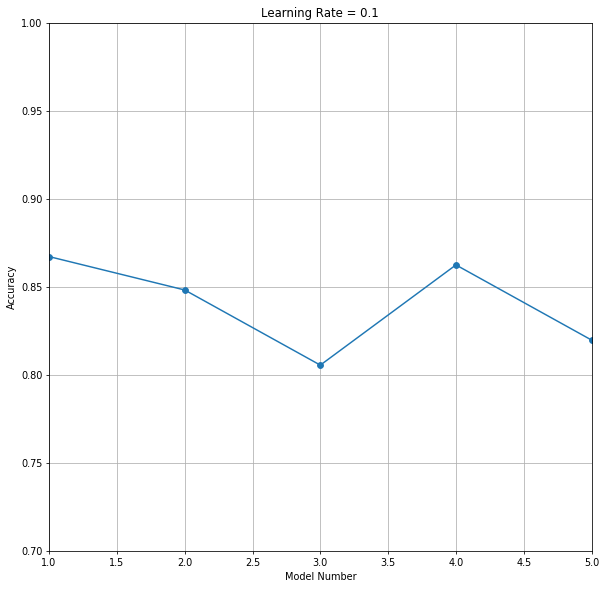

In [17]:
x = [1, 2, 3, 4, 5]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.plot(x, accuracy_rate1, marker = 'o')
plt.xlim([1,5])
plt.ylim([0.7, 1])
plt.xlabel('Model Number')
plt.ylabel('Accuracy')
plt.title('Learning Rate = 0.1')
plt.show()

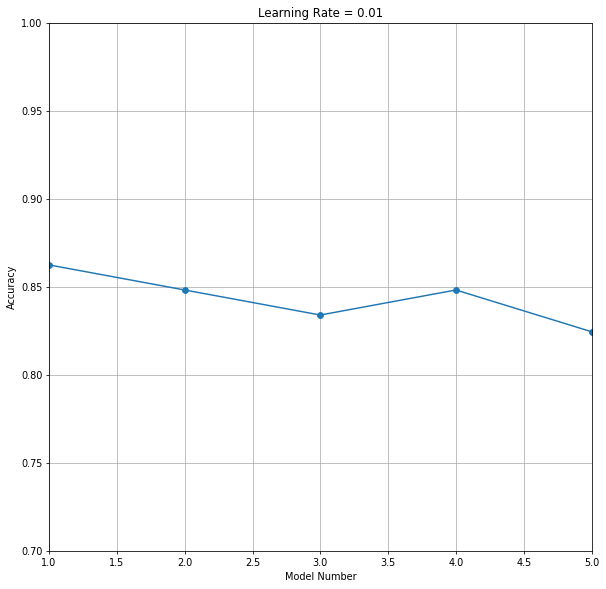

In [18]:
x = [1, 2, 3, 4, 5]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.plot(x, accuracy_rate2, marker = 'o')
plt.xlim([1,5])
plt.ylim([0.7, 1])
plt.xlabel('Model Number')
plt.ylabel('Accuracy')
plt.title('Learning Rate = 0.01')
plt.show()

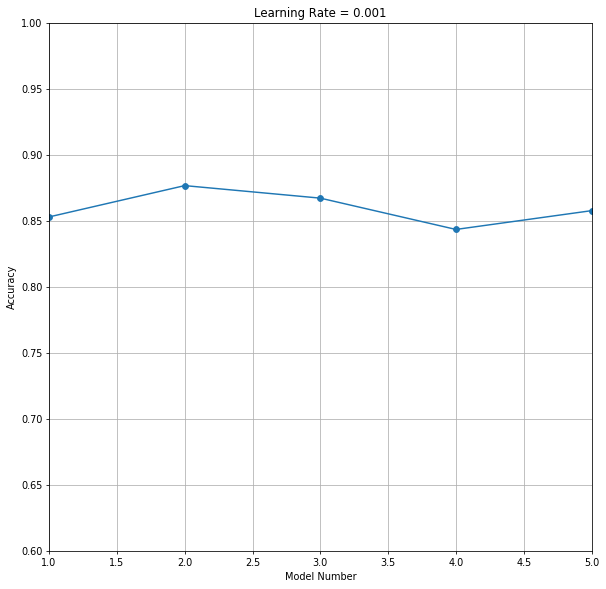

In [19]:
x = [1, 2, 3, 4, 5]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.plot(x, accuracy_rate3, marker = 'o')
plt.xlim([1,5])
plt.ylim([0.6, 1])
plt.xlabel('Model Number')
plt.ylabel('Accuracy')
plt.title('Learning Rate = 0.001')
plt.show()

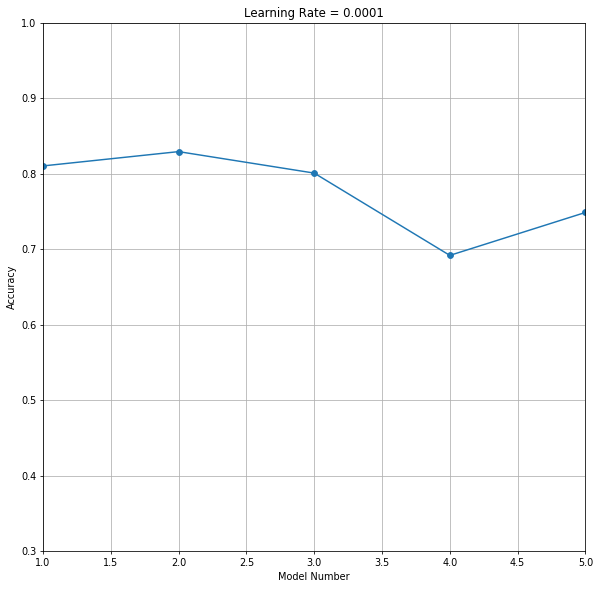

In [20]:
x = [1, 2, 3, 4, 5]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.plot(x, accuracy_rate4, marker = 'o')
plt.xlim([1,5])
plt.ylim([0.3, 1])
plt.xlabel('Model Number')
plt.ylabel('Accuracy')
plt.title('Learning Rate = 0.0001')
plt.show()

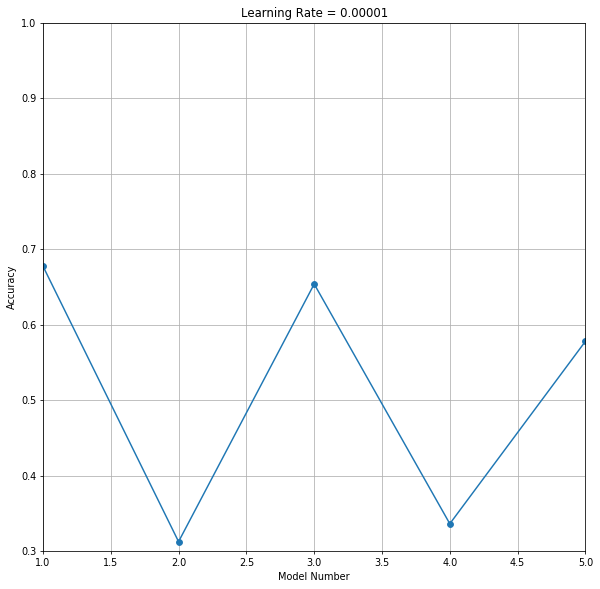

In [21]:
x = [1, 2, 3, 4, 5]
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.grid(True, which="both")
plt.plot(x, accuracy_rate5, marker = 'o')
plt.xlim([1,5])
plt.ylim([0.3, 1])
plt.xlabel('Model Number')
plt.ylabel('Accuracy')
plt.title('Learning Rate = 0.00001')
plt.show()